In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [12]:
# df.rename(columns={"Unnamed: 0" : "key"}, inplace=True)
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True) #drop irrelevant fields for prediction

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [14]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
df.where(df['passenger_count']>0, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199291 non-null  float64
 1   pickup_datetime    199291 non-null  object 
 2   pickup_longitude   199291 non-null  float64
 3   pickup_latitude    199291 non-null  float64
 4   dropoff_longitude  199291 non-null  float64
 5   dropoff_latitude   199291 non-null  float64
 6   passenger_count    199291 non-null  float64
dtypes: float64(6), object(1)
memory usage: 12.2+ MB


In [19]:
df.dropna(axis=0, inplace=True)

In [20]:
df['passenger_count']=df['passenger_count'].astype('int')

In [21]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [22]:
df.describe() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199291.000000,199291.000000,199291.000000,199291.000000,199291.000000,199291.000000
mean,11.366715,-72.529906,39.937072,-72.527194,39.924833,1.690528
std,9.910563,11.434738,7.723757,13.121316,6.795541,1.384807
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992065,40.734796,-73.991410,40.733826,1.000000
50%,8.500000,-73.981825,40.752585,-73.980095,40.753042,1.000000
75%,12.500000,-73.967158,40.767157,-73.963663,40.767995,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [23]:
df['fare_amount'].min() #min fare amount is negative

-52.0

In [24]:
df['fare_amount']=df['fare_amount'].abs()
df['fare_amount'].min()

0.0

In [25]:
df[df['fare_amount']==df['fare_amount'].min()] 
#fare amount cannot be zero, and last entry here is an underwater, middle of the ocean coordinates, which is not practical, so removing all 5 of these.

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20744,0.0,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1
22182,0.0,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2
87467,0.0,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
156738,0.0,2015-02-17 08:48:08 UTC,-73.937714,40.758541,-73.937721,40.758541,1
197172,0.0,2015-02-13 07:35:32 UTC,0.000000,0.000000,0.000000,0.000000,5


In [26]:
df.drop(df[df['fare_amount'] == df['fare_amount'].min()].index, inplace = True)
df['fare_amount'].min()

0.01

In [27]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime, errors='coerce')

In [28]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int32
dtype: object

In [29]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

df=df.drop(['pickup_datetime'], axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [44]:
from math import * 
# function to calculate the travel distance from the longitudes and latitudes 
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist= [] 
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2= map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long= long2- long1
#         dist_lati= lati2- lati1
#         a= sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2 
#         c= 2 * asin(sqrt(a))*6371 
        a = sin(lati1)*sin(lati2)+cos(lati1)*cos(lati2)*cos(dist_long)
#         print('Current a value: ')
#         print(a)
#         if(a>1.0):
#             a=1
#         elif(a<-1.0):
#             a=-1
        a = np.clip(a, -1.0, 1.0)
        c = acos(a)*6371
        travel_dist.append(c) 
    
    return travel_dist

In [45]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(), 
                                          df['pickup_latitude'].to_numpy(),
                                          df['dropoff_longitude'].to_numpy(), 
                                          df['dropoff_latitude'].to_numpy() ) 
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dist_travel_km       AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

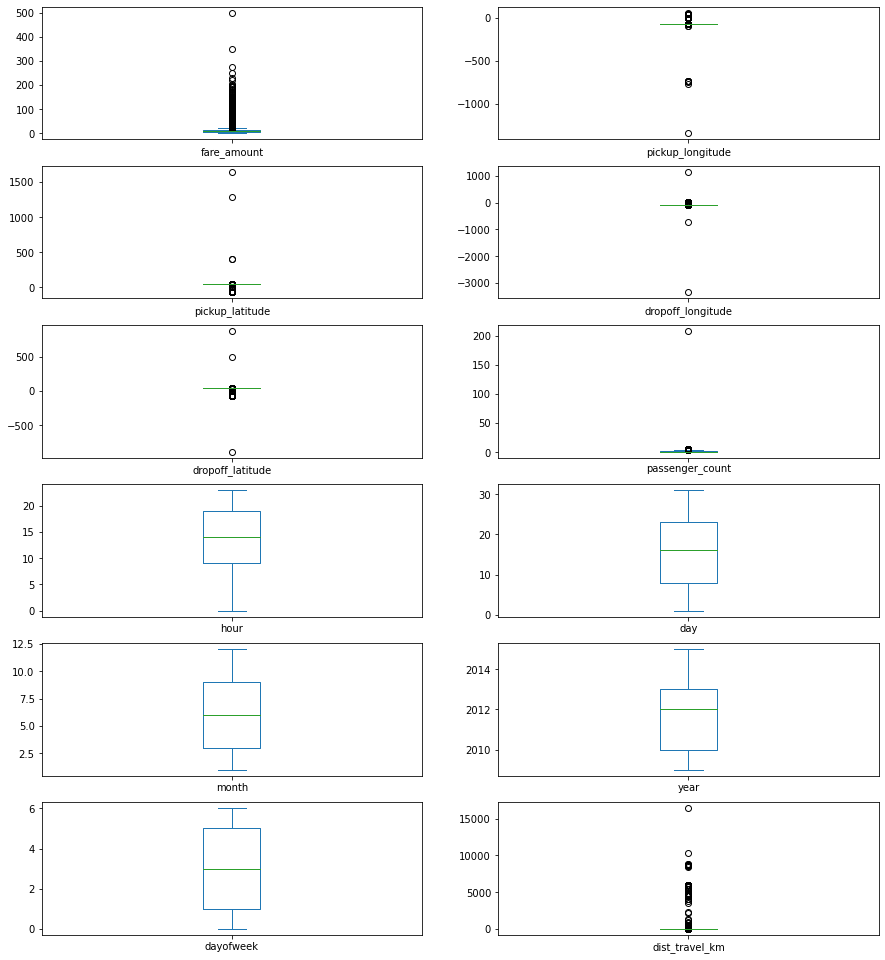

In [46]:
df.plot(kind = "box",subplots = True, layout = (7,2), figsize=(15,20))

In [47]:
df['passenger_count'].max()

208

In [48]:
print(df[df['passenger_count']==df['passenger_count'].max()].count()) #only one entry, drop it
df.drop(df[df['passenger_count']==df['passenger_count'].max()].index, inplace=True)
print(df['passenger_count'].max())

fare_amount          1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
hour                 1
day                  1
month                1
year                 1
dayofweek            1
dist_travel_km       1
dtype: int64
6


In [49]:
# nc = list(filter(lambda col: col!='pickup_datetime' and col!='Unnamed: 0', df.columns))
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
count,199285.000000,199285.000000,199285.000000,199285.000000,199285.000000,199285.000000,199285.000000,199285.000000,199285.000000,199285.000000,199285.000000,199285.000000
mean,11.369897,-72.530235,39.937251,-72.527895,39.925216,1.689480,13.492676,15.705332,6.283218,2011.743759,3.049382,20.658881
std,9.907222,11.433754,7.723354,13.119500,6.794466,1.305413,6.516195,8.686774,3.438419,1.859119,1.946747,380.705693
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991410,40.733827,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.215401
50%,8.500000,-73.981825,40.752584,-73.980095,40.753040,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.122003
75%,12.500000,-73.967160,40.767157,-73.963665,40.767995,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.876408
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,16409.239135


In [50]:
df_without_outliers=df.copy()
for col in df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    print(f'{col}:\t{lb} to {ub}\n')
#     df_without_outliers[col]=np.where((df[col]<lb)|(df[col]>ub), np.nan, df[col])
    df_without_outliers[col]=np.clip(df_without_outliers[col], a_min=lb, a_max=ub)

fare_amount:	-3.75 to 22.25

pickup_longitude:	-74.02942250000001 to -73.9298025

pickup_latitude:	40.68625450000001 to 40.81569849999999

dropoff_longitude:	-74.0330275 to -73.92204750000002

dropoff_latitude:	40.682575000000014 to 40.81924699999999

passenger_count:	-0.5 to 3.5

hour:	-6.0 to 34.0

day:	-14.5 to 45.5

month:	-6.0 to 18.0

year:	2005.5 to 2017.5

dayofweek:	-5.0 to 11.0

dist_travel_km:	-2.7761092033148653 to 7.8679190730711195



fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dist_travel_km       AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

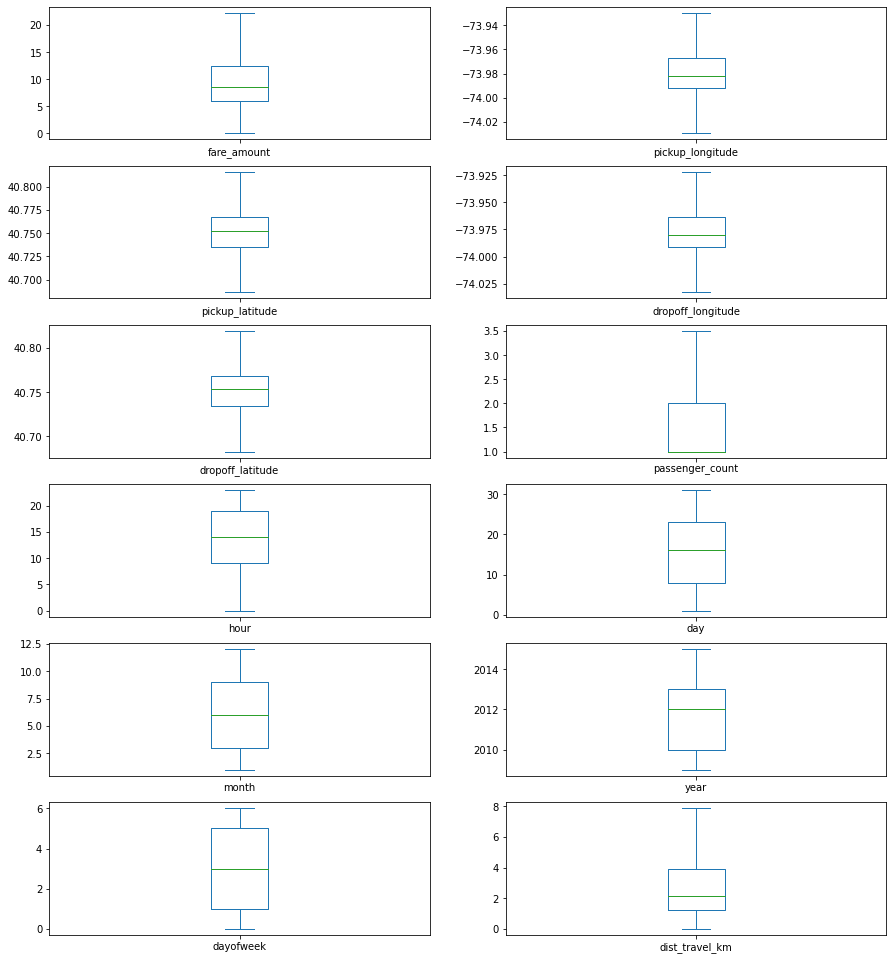

In [51]:
df_without_outliers.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [52]:
data = df_without_outliers.copy()

<AxesSubplot:>

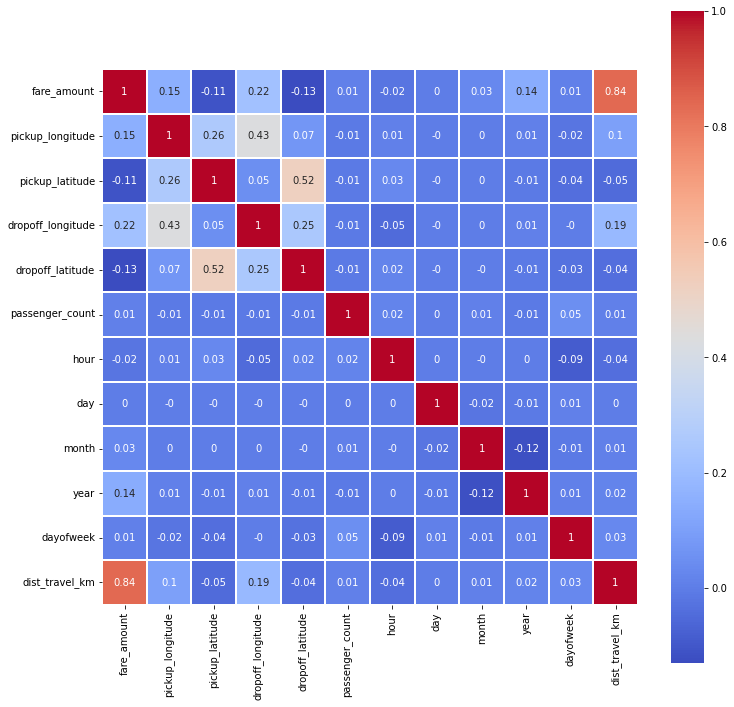

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

In [68]:
x = data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = data['fare_amount']

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [69]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.33, random_state=1)
regression = LinearRegression()
#linear regression

In [70]:
regression.fit(X_train,y_train)

LinearRegression()

In [71]:
regression.intercept_ #To find the linear intercept

10.089028964902734

In [72]:
regression.coef_

array([ 0.35148811, -0.23260699,  0.33403819, -0.49651141,  0.05779988,
        0.05826739,  0.02174804,  0.17999836,  0.6632994 , -0.06257601,
        4.45759139])

In [73]:
pred=regression.predict(X_test)

In [74]:
print(r2_score(y_test, pred))

0.7500788788252537


In [75]:
MSE = mean_squared_error(y_test,pred)
MSE

7.401977693483102

In [76]:
RMSE = np.sqrt(MSE)
RMSE

2.7206575847546675

In [77]:
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [78]:
pred = rf.predict(X_test)
pred

array([21.2 ,  6.8 , 11.5 , ...,  7.86,  7.09,  7.55])

In [79]:
R=r2_score(y_test,pred)
R

0.7888040153953392

In [80]:
MSE = mean_squared_error(y_test,pred)
MSE

6.255045430529474

In [81]:
RMSE = np.sqrt(MSE)
RMSE

2.5010088825371